<a href="https://colab.research.google.com/github/pathakadithi/Full-Stack-Project/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

from google.colab import drive
drive.mount('/content/drive')

# Then give path to your file
df = pd.read_csv("/content/drive/MyDrive/Housing.csv")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

#inside MyDrive
df = pd.read_csv("/content/drive/MyDrive/Housing.csv")

print(df.head())
print(df.info())
print(df.isnull().sum())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

In [11]:
# Drop ID column if present
if 'Id' in df.columns:
    df.drop(columns=['Id'], inplace=True)

# Fill missing numeric columns with median
for col in df.select_dtypes(include=[np.number]).columns:
    df[col].fillna(df[col].median(), inplace=True)

# One-hot encode categorical columns
df = pd.get_dummies(df, drop_first=True)


/tmp/ipython-input-369749877.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [14]:
print(df.columns.tolist())


['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']


In [15]:
X = df.drop(columns=['price'])   # Features
y = df['price']                  # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


In [17]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE  = {mae:.2f}")
print(f"MSE  = {mse:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.4f}")


MAE  = 970043.40
MSE  = 1754318687330.66
RMSE = 1324506.96
R²   = 0.6529


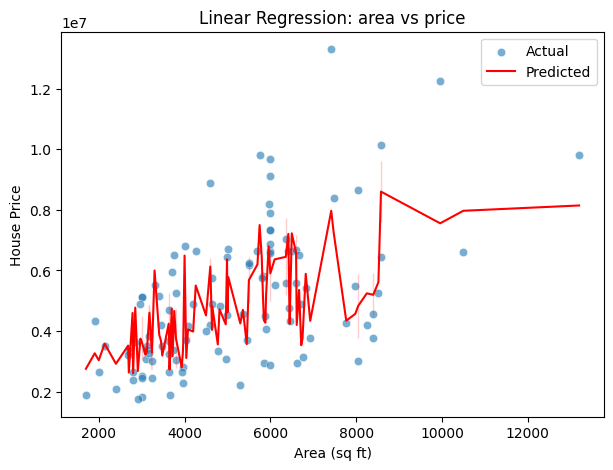

In [22]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=X_test['area'], y=y_test, label="Actual", alpha=0.6)
sns.lineplot(x=X_test['area'], y=y_pred, color="red", label="Predicted")
plt.xlabel("Area (sq ft)")
plt.ylabel("House Price")
plt.title("Linear Regression: area vs price")
plt.legend()
plt.show()


In [23]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

print(coef_df.head(10))
print(f"Intercept: {lr.intercept_:.2f}")


                         Feature   Coefficient
2                      bathrooms  1.094445e+06
9            airconditioning_yes  7.914267e+05
8            hotwaterheating_yes  6.846499e+05
10                  prefarea_yes  6.298906e+05
12  furnishingstatus_unfurnished -4.136451e+05
3                        stories  4.074766e+05
7                   basement_yes  3.902512e+05
5                   mainroad_yes  3.679199e+05
6                  guestroom_yes  2.316100e+05
4                        parking  2.248419e+05
Intercept: 260032.36
